# Otoczka wypukła

In [39]:
import numpy as np
import pandas as pd
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer
from functools import cmp_to_key
np.random.seed(624624)

### Przykładowe zastosowanie narzędzia do wizualizacji

In [40]:
def draw_example_1():
    vis = Visualizer()

    # point = (x, y)
    points = [
        (-62.781083483620016, 9.295526540248986),
        (-10.543100198806997, -26.080520917553812),
        (-81.64932184252287, -74.42163273030921),
        (-36.297317058417946, -72.91194239793609),
        (37.795092197502356, 57.71110085986143),
        (62.511149567563905, -29.172821102708937),
        (21.82806671019955, 2.647377124715007),
        (-46.24539555503924, 42.65521594922478),
        (-77.92302295134137, -7.666110427206263),
        (25.85862324263843, 62.49564419388622),
        (-27.71649622636616, -67.33453457840331),
        (94.83039177581244, -55.52473300629532),
        (-26.29675918891381, -51.30150933048958),
        (-70.11654929355294, 16.723865705806816),
        (26.682887992598097, -65.55763984116587),
        (57.03377667841906, -55.56635171240132),
        (-16.053624841650247, -42.333295668531456),
        (-56.810858686395505, -37.41219002465095),
        (15.604076302407279, -24.85779870929437),
        (-71.77261869976445, -12.306083264402673),
    ]
    # line_segment = ((x1, y1), (x2, y2))
    line_segments = [
        ((-81.64932184252287, -74.42163273030921), (-36.297317058417946, -72.91194239793609)),
        ((-36.297317058417946, -72.91194239793609), (26.682887992598097, -65.55763984116587)),
        ((26.682887992598097, -65.55763984116587), (94.83039177581244, -55.52473300629532)),
        ((94.83039177581244, -55.52473300629532), (37.795092197502356, 57.71110085986143)),
        ((37.795092197502356, 57.71110085986143), (25.85862324263843, 62.49564419388622)),
        ((25.85862324263843, 62.49564419388622), (-46.24539555503924, 42.65521594922478)),
        ((-46.24539555503924, 42.65521594922478), (-70.11654929355294, 16.723865705806816)),
        ((-70.11654929355294, 16.723865705806816), (-77.92302295134137, -7.666110427206263)),
        ((-77.92302295134137, -7.666110427206263), (-81.64932184252287, -74.42163273030921)),
    ]
    vis.add_point(points, color="green")
    vis.add_line_segment(line_segments, color="blue")
    vis.show()
    

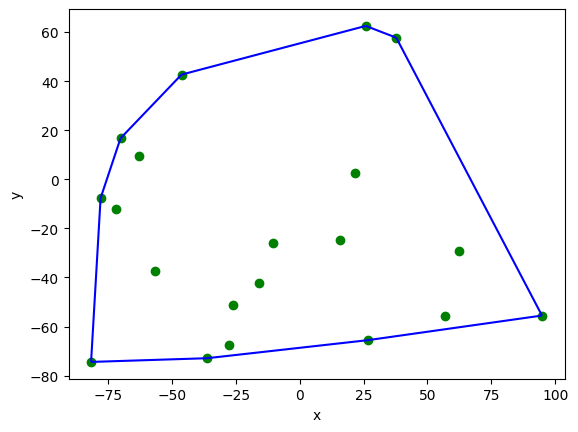

In [41]:
draw_example_1()

### Wprowadzenie

Czym jest otoczka wypukła?  
Podzbiór płaszczyzny $Q$ nazywamy wypukłym iff, gdy dla dowolnej pary punktów $p, q \in Q$ odcinek $\overline{pq}$ jest całkowicie zawarty w $Q$.  
Otoczka wypukła $\mathcal{CH}(Q)$ zbioru $Q$ jest najmniejszym wypukłym zbiorem zawierającym $Q$.

### Zastosowania otoczku wypukłej

Otoczki wypukłe - w szczególności otoczki wypukłe w przestrzeni trójwymiarowej - są spotykane w różnych zastosowaniach. Na przykład używa się ich do przyspieszania wykrywania kolizji w animacji komputerowej. Przepuśćmy, że chcemy sprawdzić, czy dwa obiekty $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się. Jeśli przez większość czasu odpowiedź na to pytanie jest negatywna, to opłaca się następująca strategia. Przybliżamy obiekty przez prostrze obiekty $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$, które zawierały orginały. Jeśli chcemy sprwadzić, czy $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się, najpierw sprawdzamy, czy przecinają się $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$. Jeśli występuje ten przypadek, to powinniśmy wykonać test na orginalnych obiektach, który jest przepuszczalnie znacznie kosztowniejszy.  
Sprawdzanie przecięcia otoczek wypukłych jest bardziej skomplikowane niż dla sfer - choć mimo to łatwiejsze niż dla obiektów niewypukłych - ale otoczki wypukłe mogą dużo lepiej przybliżać większość obiektów.

## Generowanie losowych punktów na płaszczyźnie 

Zapoznaliśmy się i wiemy jak generowac losowe punkty na płaszczyźnie z laboratorium I (współrzędne rzeczywiste typu *double* - podwójna precyzja obliczeń). Przygotuj zestawy punktów, które będzie można użyć jako testowe dla algorytmów obliczania otoczki wypukłej.

Uzupełnij funkcję ```generate_uniform_points```.

In [42]:
np.random.seed(624624)
def generate_uniform_points(left, right, n=10**5):
    """
    Funkcja generuje równomiernie n punktów na kwadratowym obszarze od left do right
    (jednakowo na osi x i y) o współrzędnych rzeczywistych.
    
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: lista punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    x = np.random.uniform(left, right, n)
    y = np.random.uniform(left, right, n)
    return list(zip(x, y))


<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x \in \langle -100,100 \rangle$ oraz $y \in \langle -100,100\rangle$.

In [43]:
points_a = generate_uniform_points(-100, 100, 100)

Zwizualizuj wygenerowane punkty.

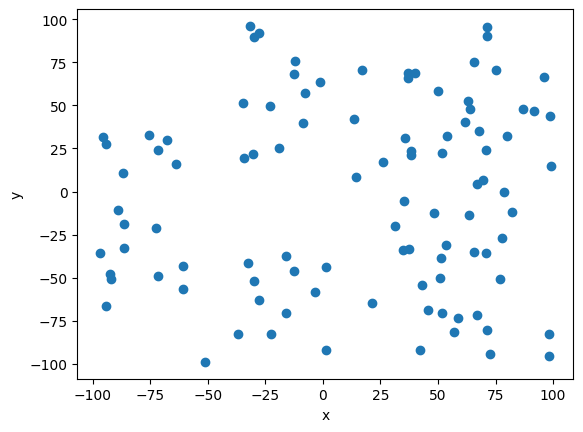

In [44]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

Uzupełnij funkcję ```generate_circle_points```.

In [45]:
import numpy as np
np.random.seed(624624)

def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje n losowych punktów na okręgu o środku O i promieniu R
    :param O: krotka (x0, y0) – środek okręgu
    :param R: promień okręgu 
    :param n: liczba punktów
    :return: lista krotek [(x1, y1), (x2, y2), ..., (xn, yn)]
    """
    x0, y0 = O
    angles = np.random.random(n) * 2 * np.pi
    x = x0 + R * np.cos(angles)
    y = y0 + R * np.sin(angles)
    return list(zip(x, y))

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $O = (0,0)$ i promieniu $R = 10$.

In [46]:
points_b = generate_circle_points((0, 0), 10, 100)

Zwizualizuj wygenerowane punkty.

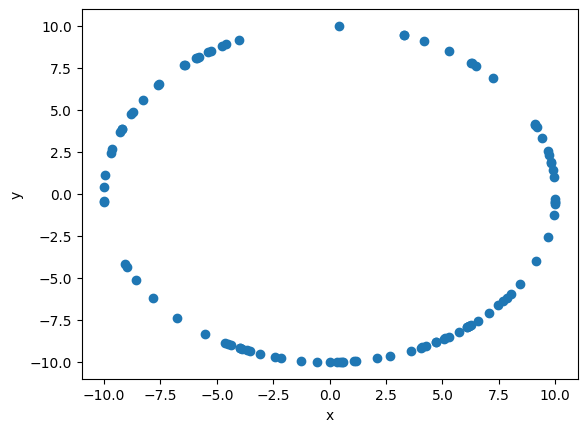

In [47]:
# visualize(points_b)
vis.clear()
vis.add_point(points_b)
vis.show()

Jak można było zauważyć, to funkcje ```generate_uniform_points``` oraz ```generate_circle_points``` są takie same jak w laboratorium I.

Uzupełnij funkcję ```generate_rectangle_points```.

In [50]:
import numpy as np

def generate_rectangle_points(a, b, c, d, n):
    '''
    Funkcja tworzy n losowych punktów na obwodzie prostokąta
    o wierzchołkach a, b, c, d (boki równoległe do osi).
    Współrzędne mogą być podane w dowolnej kolejności.
    '''
    np.random.seed(624624)

    # wyznacz granice prostokąta
    x_lo, x_hi = min(a[0], b[0], c[0], d[0]), max(a[0], b[0], c[0], d[0])
    y_lo, y_hi = min(a[1], b[1], c[1], d[1]), max(a[1], b[1], c[1], d[1])

    width  = x_hi - x_lo
    height = y_hi - y_lo

    if width <= 0 or height <= 0:
        raise ValueError("Błędne dane — szerokość i wysokość muszą być dodatnie.")

    # oblicz prawdopodobieństwa dla poszczególnych boków
    perim = 2 * (width + height)
    probs = [width / perim, height / perim, width / perim, height / perim]

    pts = []
    for _ in range(n):
        side = np.random.choice(4, p=probs)

        if side == 0:        # dół
            x, y = np.random.uniform(x_lo, x_hi), y_lo
        elif side == 1:      # prawa krawędź
            x, y = x_hi, np.random.uniform(y_lo, y_hi)
        elif side == 2:      # góra
            x, y = np.random.uniform(x_lo, x_hi), y_hi
        else:                # lewa krawędź
            x, y = x_lo, np.random.uniform(y_lo, y_hi)

        pts.append((x, y))

    return np.array(pts)


<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na obwodzie prostokąta, którego wyznaczają wierzchołki
$(-10,-10), (10,-10), (10,10)$ oraz $(-10,10)$.

In [51]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

Zwizualizuj wygenerowane punkty.

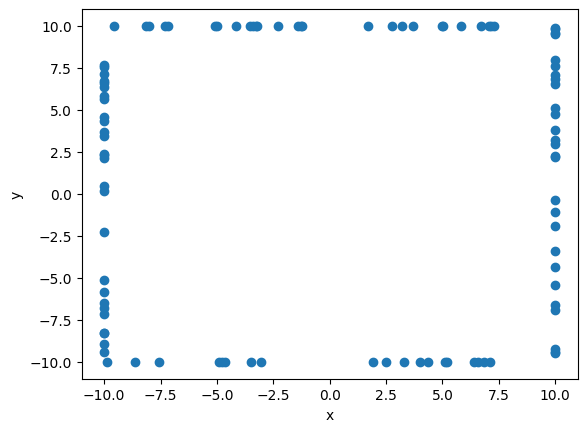

In [52]:
# visualize(points_c)
vis.clear()
vis.add_point(points_c)
vis.show()

Uzupełnij funkcję ```generate_square_points```.

In [53]:
import numpy as np

np.random.seed(624624)
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20):
    
    a = tuple(map(float, a))
    b = tuple(map(float, b))
    c = tuple(map(float, c))
    d = tuple(map(float, d))

    points = {a, b, c, d}

    for _ in range(axis_n):
        t = np.random.random()
        x = a[0] + t * (b[0] - a[0])
        y = a[1] + t * (b[1] - a[1])
        points.add((x, y))

    for _ in range(axis_n):
        t = np.random.random()
        x = a[0] + t * (d[0] - a[0])
        y = a[1] + t * (d[1] - a[1])
        points.add((x, y))

    for _ in range(diag_n):
        t = np.random.random()
        x = a[0] + t * (c[0] - a[0])
        y = a[1] + t * (c[1] - a[1])
        points.add((x, y))

    for _ in range(diag_n):
        t = np.random.random()
        x = b[0] + t * (d[0] - b[0])
        y = b[1] + t * (d[1] - b[1])
        points.add((x, y))

    return list(points)

<span style="color:red">Ćw.</span> Wygeneruj losowe punktów w przestrzeni 2D w następujący sposób: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu, zawierający punkty wyznaczające kwadrat $(0, 0), (10, 0), (10, 10)$ oraz $(0, 10)$.

In [54]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

Zwizualizuj wygenerowane punkty.

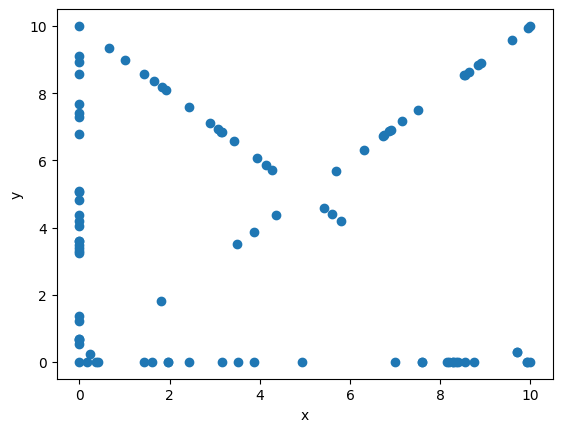

In [55]:
# visualize(points_d)
vis.clear()
vis.add_point(points_d)
vis.show()

## Algorytm Grahama oraz algorytm Jarvisa

Po przygotowaniu przykładowych zbiorów danych i ich zwizualizowaniu, chcemy zobaczyć jak buduje się dla nich otoczka wypukła z wykorzystaniem różnych algortymów.  
W tych dwóch algorytmach potrzebna będzie funkcja którą już dobrze znamy, czyli funkcja, która sprawdza po której stornie prostej znajduje się punkt.  
Dla każdego algorytmu trzeba będzie zaimplementować dwie funkcje obliczające otoczkę wypukłę, ze względu, że jedna z nich będzie miała możliwość wyświetlania kroków postępowania w algorytmie. Druga funkcja będzie uzyteczna do porównywania czasów dla różnych zbiorów danych i względęm algorytmów.  
W graficznej funkcji danego algorytmu, jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualne rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki, wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).  

### Algorytm Grahama

Algorytm Grahama tworzy otoczkę wypukłą poprzez utrzymywanie stosu $S$, w którym znajdują się punkty, które mogą, ale nie muszą tworzyć otoczki wypukłej. Za każdym razem jest wstawiany na stos (push) jeden punkt z zbioru punktów $Q$ i jest on usuwany ze stosu (pop), jeżeli nie jest punktem $\mathcal{CH}(Q)$. Kiedy algorytm kończy się, stos $S$ zawiera tylko punkty otoczki wypukłej $\mathcal{CH}(Q)$ w kierunku przeciwnym do ruchu wskazówek zegera.

---

Procedura $\mathtt{Graham-Build(Q)}$ przyjmuje zbiór punktów $Q$, gdzie $|Q| \geq 3$. Wywołuje ona funkcję $\mathtt{TOP(S)}$, która zwraca punkt z góry stosu bez zmieniania $S$ oraz
$\mathtt{NEXT-TO-TOP(S)}$, która zwraca punkt ponieżej góry stosu $S$, bez zmieniania stosu. Funkcja $\mathtt{PUSH(p, S)}$ wstawia punkt $p$ na stos $S$. Funkcja $\mathtt{POP(p, S)}$ usuwa punkt $p$ ze stosu $S$.

$\mathtt{Graham-Build(Q)}$  
1)  niech $p_0$ będzie punktem w zbiorze Q z najmniejszą współrzędną $y$,  
    oraz najmniejszą współrzędną $x$ w przypadku, gdy wiele punktów ma tą samą współrzędną $x$  
    
2)  nich $\mathtt{\langle p_1, p_2, \dots, p_m \rangle}$ będzie pozostałym zbiorem punktów w $Q$ posortowanym  
    zgodnie z przeciwnym ruchem wskazówek zegara wokół punktu $p_0$  
    (jeżeli więcej niż jeden punkt ma ten sam kąt to usuwamy wszystkie punkty  
     z wyjątkiem tego najbardziej oddalonego od $p_0$)  
3) stwórz pusty stos $S$  
4) $\mathtt{PUSH(p_0, S)}$
5) $\mathtt{PUSH(p_1, S)}$
6) $\mathtt{PUSH(p_2, S)}$
7) **for** $i = 3$ **to** m  
8) &emsp;**while** kąt utworzony przez $\mathtt{NEXT-TO-TOP(S)}$, $\mathtt{TOP(S)}$ oraz $p_i$ tworzy lewostronny skręt
9) &emsp;&emsp;$\mathtt{POP(S)}$
10) &emsp;$\mathtt{PUSH(p_i, S)}$
11) **return** $S$


---

Lewostronny skręt oznacza, że dla trzech kolejnych punktów $a, b, c$, punkt $b$ leży po lewej stronie prostej $ac$.  
  

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama.

In [56]:
def orient(a, b, c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

In [57]:
def dst(p1, p2):
    # kwadrat odległości, bo nie warto robic pierwsiastka bo to dodatkowa operacja, ktora nie zmieni wyniku porownania dwoch odleglosci
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

In [58]:
# napisac jak bylo sortowane punkty, sposob postepowania z punktami wspoliniowymi, kiedy zostaly wyeliminowane, lub
# jesli nie to jak z nimi postepowalismy, co uzywamy do sortowania po kacie (ja wyznacznik, druga opcja to katy trygonometryczne)\
# to wszytko ma byc napisane na sprawozdaniu


def graham_algorithm(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    p0 = min(Q, key=lambda p: (p[1], p[0]))

    def cmp(a, b):
        o = orient(p0, a, b)
        if o > 10**-24:
            return -1 # a przed b
        elif o < -10**-24:
            return 1 # b przed a
        else:
            da = dst(p0, a)
            db = dst(p0, b)
            return -1 if da < db else 1 if da > db else 0

    sorted_points = sorted(Q, key=cmp_to_key(cmp))

    stack = []
    for pkt in sorted_points:
        while len(stack) >= 2 and orient(stack[-2], stack[-1], pkt) <= 10**-24:
            stack.pop()
        stack.append(pkt)

    return stack

Przetestuj swoją implementacje algorytmu Grahama, by sprawdzić czy poprawnie obliczana jest otoczka.

In [59]:
Test().runtest(1, graham_algorithm)

Lab 2, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 3.405s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [60]:
from functools import cmp_to_key

def graham_algorithm_draw(Q):
    vis = Visualizer()
    vis.axis_equal()

    Q_tuples = [tuple(pt) for pt in Q]
    base_points_fig = vis.add_point(Q_tuples, color="black")

    if len(Q_tuples) <= 2:
        vis.add_point(Q_tuples, color="red")
        if len(Q_tuples) == 2:
            vis.add_line_segment([Q_tuples[0], Q_tuples[1]], color="red")
        vis.show()
        return Q_tuples, vis

    p0 = min(Q_tuples, key=lambda x: (x[1], x[0]))

    def cmp_angle(a, b):
        oa = orient(p0, a, b)
        eps = 10**-24
        if oa > eps:
            return -1
        elif oa < -eps:
            return 1
        else:
            da = dst(p0, a)
            db = dst(p0, b)
            return -1 if da < db else 1 if da > db else 0

    Q_sorted = sorted(Q_tuples, key=cmp_to_key(cmp_angle))

    vis.add_point([p0], color="red")
    vis.add_point(Q_sorted, color="black")

    S = [p0]
    edges = []
    last_test_line = None

    marker_for_point = {}

    marker_for_point[p0] = vis.add_point([p0], color="red")

    for p in Q_sorted[1:]:
        if last_test_line is not None:
            vis.remove_figure(last_test_line)
            last_test_line = None

        last_test_line = vis.add_line_segment([S[-1], p], color="green")

        while len(S) >= 2 and orient(S[-2], S[-1], p) <= 10**-24:
            removed_point = S[-1]
            if removed_point in marker_for_point:
                vis.remove_figure(marker_for_point.pop(removed_point))
            vis.add_point([removed_point], color="yellow")

            if edges:
                vis.remove_figure(edges.pop())

            S.pop()

            if last_test_line is not None:
                vis.remove_figure(last_test_line)
            if len(S) > 0:
                last_test_line = vis.add_line_segment([S[-1], p], color="green")

        S.append(p)
        marker_for_point[p] = vis.add_point([p], color="red")

        if last_test_line is not None:
            vis.remove_figure(last_test_line)
            last_test_line = None

        if len(S) >= 2:
            edges.append(vis.add_line_segment([S[-2], S[-1]], color="red"))

    # zamknięcie otoczki
    edges.append(vis.add_line_segment([S[-1], S[0]], color="red"))
    vis.show()

    return S, vis

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [ ]:
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)

In [ ]:
print(len(graham_algorithm(graham_points_a)))

In [ ]:
# visualize(graham_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(graham_points_a[i], graham_points_a[i+1]) for i in range(len(graham_points_a)-1)])
vis.add_line_segment([graham_points_a[-1], graham_points_a[0]])
vis.show()

Zbiór danych B

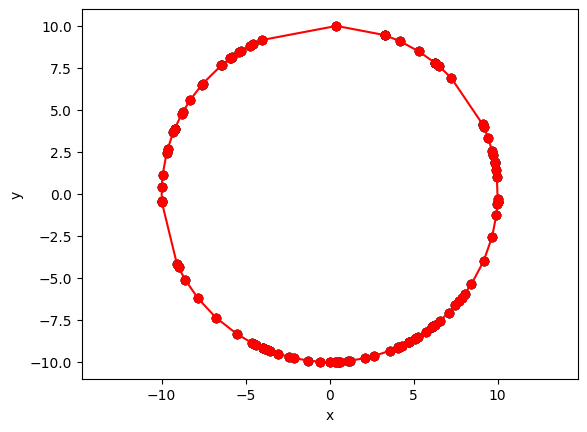

In [25]:
graham_points_b, vis_graham_b = graham_algorithm_draw(points_b)

In [26]:
print(len(graham_algorithm(graham_points_b)))

100


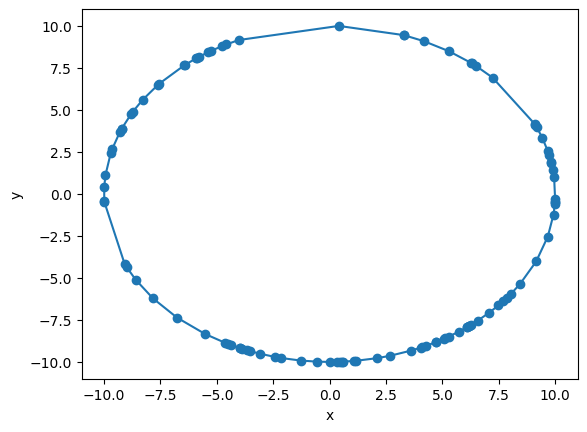

In [29]:
# visualize(graham_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(graham_points_b[i], graham_points_b[i+1]) for i in range(len(graham_points_b)-1)])
vis.add_line_segment([graham_points_b[-1], graham_points_b[0]])
vis.show()

Zbiór danych C

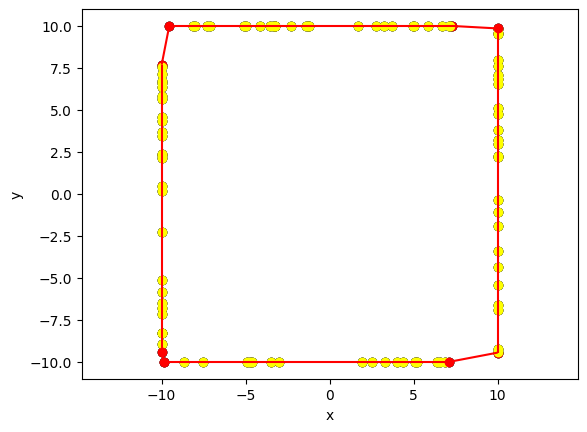

In [67]:
graham_points_c, vis_graham_c = graham_algorithm_draw(points_c)

In [68]:
print(len(graham_algorithm(graham_points_c)))

8


In [69]:
print(graham_algorithm(graham_points_c))

[(np.float64(-9.883709651549193), np.float64(-10.0)), (np.float64(7.090608858368988), np.float64(-10.0)), (np.float64(10.0), np.float64(-9.44660579177819)), (np.float64(10.0), np.float64(9.849923630667227)), (np.float64(7.277016348988344), np.float64(10.0)), (np.float64(-9.547638279085135), np.float64(10.0)), (np.float64(-10.0), np.float64(7.690613606129375)), (np.float64(-10.0), np.float64(-9.396261927723522))]


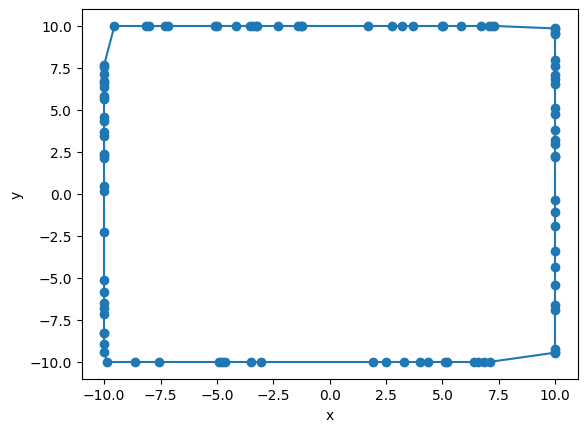

In [72]:
# visualize(graham_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(graham_points_c[i], graham_points_c[i+1]) for i in range(len(graham_points_c)-1)])
vis.add_line_segment([graham_points_c[-1], graham_points_c[0]])
vis.show()

Zbiór danych D

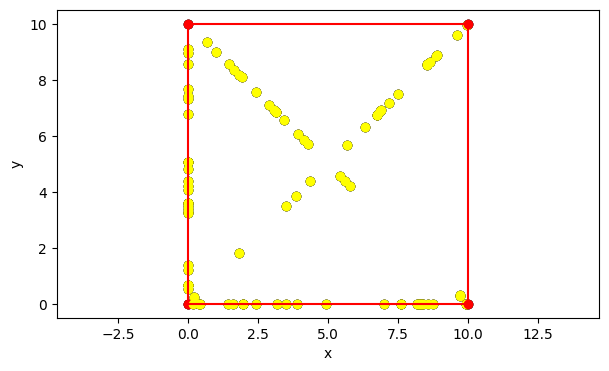

In [123]:
graham_points_d, vis_graham_d = graham_algorithm_draw(points_d)

In [124]:
print(len(graham_algorithm(graham_points_d)))

4


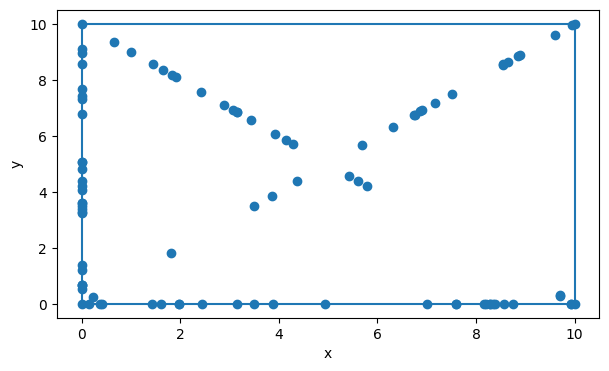

In [127]:
# visualize(graham_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(graham_points_d[i], graham_points_d[i+1]) for i in range(len(graham_points_d)-1)])
vis.add_line_segment([graham_points_d[-1], graham_points_d[0]])
vis.show()

### Algorytm Jarvisa

Algorytm Jarvisa oblicza otoczkę wypukłą dla zbioru punktów $Q$ przez technikę zwaną owijaniem paczki (*package wrapping*) lub owijaniem prezentu (*gift wrapping*). Algorytm Jarvisa buduje sekwencję $H = \langle p_1, p_2, \dots, p_m \rangle$ będącą wierzchołkami $\mathcal{CH}(Q)$. Zaczynamy od punktu $p_0$, następny punkt $p_1$ w otoczce wypukłej ma najmniejszy kąt w odniesieniu do $p_0$ (w przypadku takiego samego kąta - wybiera się punkt najdalej od $p_0$). Podobnie, gdy $p_2$ ma najmniejszy kąt w odniesieniu do $p_1$, itd.. Zauważyć warto, że możemy tym sposobem obliczyć lewy i prawy łańcuch otoczki wypukłej $\mathcal{CH}(Q)$. Lewy łańcuch buduje się podobnie. Gdy osiągniemy najwyższy wierzchołej w prawym łańcuchu $p_k$, wybieramy wierzchołek $p_{k+1}$, który ma najmniejszy kąt w odniesieniu do $p_k$, ale od ujemnej osi-$x$. Można zaimplementować algorytm Jarvisa bez konstruowania pomocniczych łańcuchów - lewego i prawego. Taka implementacja utrzymuje śledzenie kąta ostatniej strony otoczki wypukłej i wymaga sekwencji kątów boków otoczki tylko rosnącej. (Patrząc na trzy ostatnie punkty jesteśmy w stanie obliczyć jaki punkt należy włączyć do $\mathcal{CH}(Q)$ w zależności od budowanego punktu)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa.

In [34]:

def jarvis_algorithm(Q):
    """
    Algorytm Jarvisa (Gift Wrapping) do otoczki wypukłej.
    :param Q: lista punktów [(x1,y1), (x2,y2), ...]
    :return: lista punktów otoczki wypukłej
    """
    try:
        Q_tuples = [tuple(pt) for pt in Q]
        Q = Q_tuples
    except TypeError:
        pass
        
    if len(Q) <= 3:
        return Q[:]

    p0 = min(Q, key=lambda p: (p[1], p[0]))
    hull = [p0]
    point_on_hull = p0

    while True:
        candidate = Q[0] if Q[0] != point_on_hull else Q[1]
        
        for p in Q:
            if p == point_on_hull:
                continue
            
            o = orient(point_on_hull, candidate, p)
            if o < -10**-24 or (abs(o) <=10**-24 and dst(point_on_hull, p) > dst(point_on_hull, candidate)):
                candidate = p

        if candidate == p0:
            break
            
        hull.append(candidate)
        point_on_hull = candidate

    return hull

Przetestuj swoją implementacje algorytmu Jarvisa, by sprawdzić czy poprawnie obliczana jest otoczka.

In [35]:
Test().runtest(2, jarvis_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 3.257s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa z dodatkową opcją wyświetlania kroków algorytmu.

In [36]:


def jarvis_algorithm_draw(Q, points_color='black', convex_color='red', test_color='green'):

    try:
        Q_tuples = [tuple(pt) for pt in Q]
        Q = Q_tuples
    except TypeError:
        pass

    if len(Q) <= 3:
        vis = Visualizer()
        vis.add_point(Q, color=points_color)
        if len(Q) >= 2:
            vis.add_line([(Q[i], Q[i+1]) for i in range(len(Q)-1)], color=convex_color)
            vis.add_line([(Q[-1], Q[0])], color=convex_color)
        vis.show()
        return Q[:], vis

    p0 = min(Q, key=lambda p: (p[1], p[0]))
    hull = [p0]
    point_on_hull = p0

    vis = Visualizer()
    vis.add_point(Q, color=points_color)

    last_test_line = None
    for _ in range(len(Q)*2):
        
        candidate = Q[0] if Q[0] != point_on_hull else Q[1]

        for p in Q:
            if p == point_on_hull:
                continue

            if last_test_line is not None:
                vis.remove_figure(last_test_line)
                last_test_line = None

            # narysuj aktualny testowany segment i zapamiętaj referencję
            last_test_line = vis.add_line_segment([point_on_hull, p], color=test_color)

            o = orient(point_on_hull, candidate, p)
            if o < -10**-24 or (abs(o) <=10**-24 and dst(point_on_hull, p) > dst(point_on_hull, candidate)):
                candidate = p

        # usuń ostatni testowany segment
        if last_test_line is not None:
            vis.remove_figure(last_test_line)
            last_test_line = None

        if candidate == p0:
            break

        hull.append(candidate)
        vis.add_point(candidate, color=convex_color)
        vis.add_line_segment([hull[-2], hull[-1]], color=convex_color)

        point_on_hull = candidate

    vis.add_line_segment([hull[-1], hull[0]], color=convex_color)
    vis.show()
    return hull, vis

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

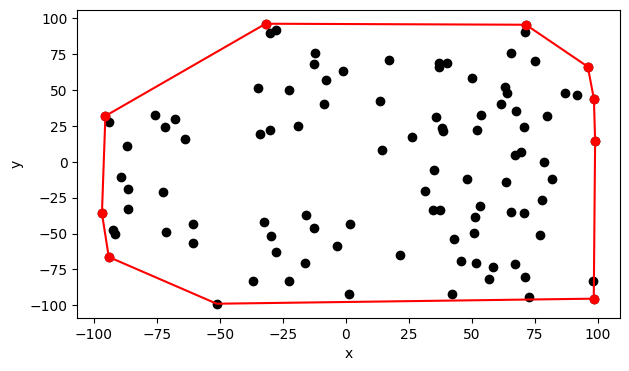

In [114]:
jarvis_points_a, vis_jarvis_a = jarvis_algorithm_draw(points_a)

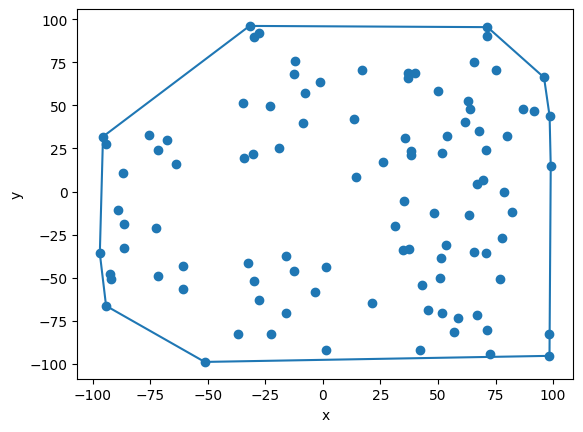

In [83]:
# visualize(jarvis_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(jarvis_points_a[i], jarvis_points_a[i+1]) for i in range(len(jarvis_points_a)-1)])
vis.add_line_segment([jarvis_points_a[-1], jarvis_points_a[0]])
vis.show()

Zbiór danych B

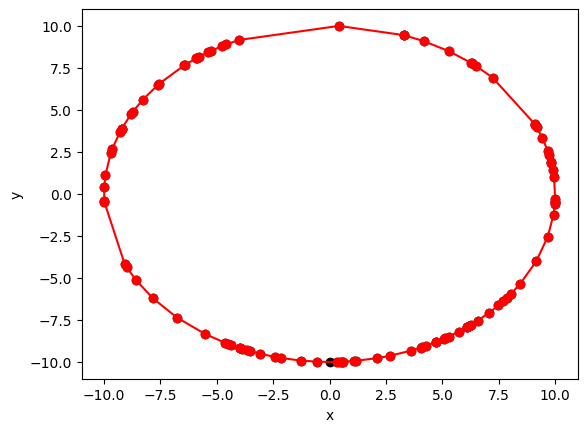

In [33]:
jarvis_points_b, vis_jarvis_b = jarvis_algorithm_draw(points_b)

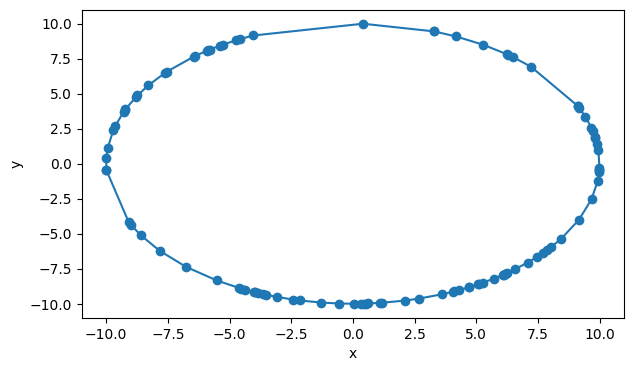

In [38]:
# visualize(jarvis_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(jarvis_points_b[i], jarvis_points_b[i+1]) for i in range(len(jarvis_points_b)-1)])
vis.add_line_segment([jarvis_points_b[-1], jarvis_points_b[0]])
vis.show()

Zbiór danych C

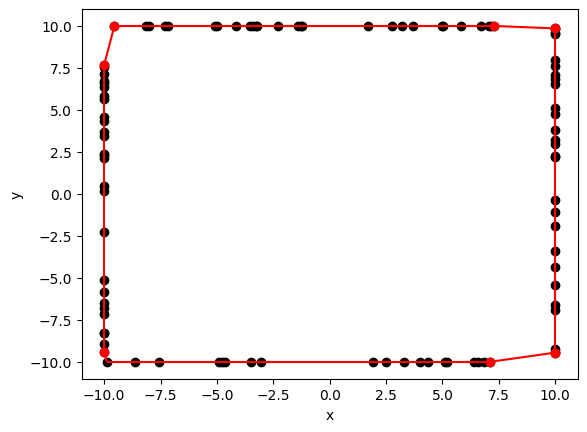

In [96]:
jarvis_points_c, vis_jarvis_c = jarvis_algorithm_draw(points_c)

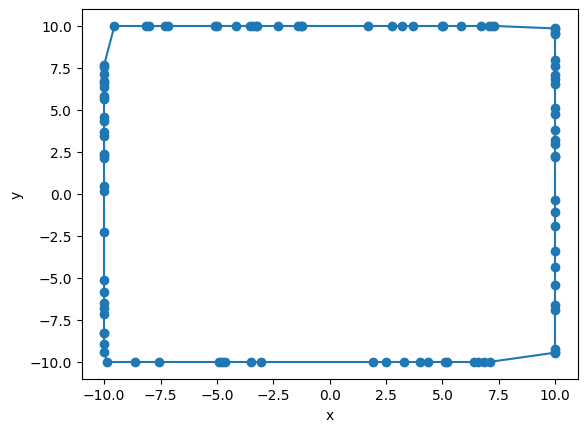

In [99]:
# visualize(jarvis_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(jarvis_points_c[i], jarvis_points_c[i+1]) for i in range(len(jarvis_points_c)-1)])
vis.add_line_segment([jarvis_points_c[-1], jarvis_points_c[0]])
vis.show()

Zbiór danych D

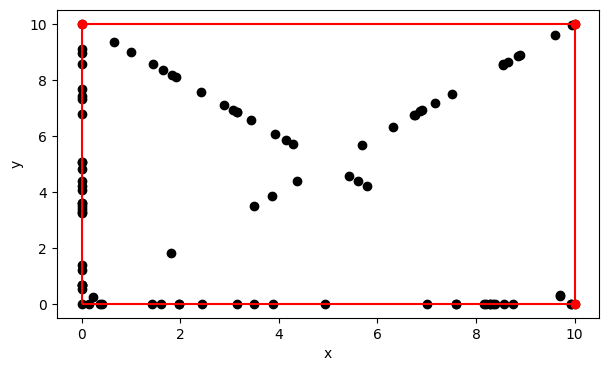

In [131]:
jarvis_points_d, vis_jarvis_d = jarvis_algorithm_draw(points_d)

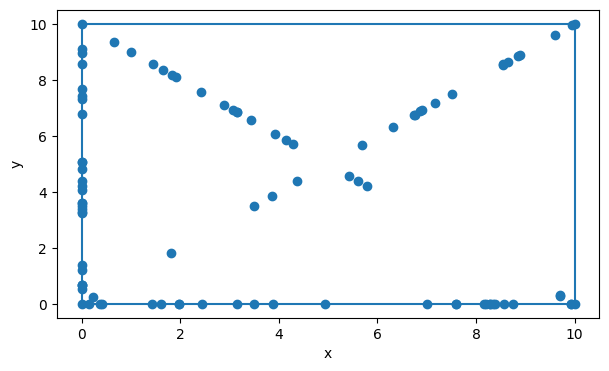

In [134]:
# visualize(jarvis_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(jarvis_points_d[i], jarvis_points_d[i+1]) for i in range(len(jarvis_points_d)-1)])
vis.add_line_segment([jarvis_points_d[-1], jarvis_points_d[0]])
vis.show()


---

Po zobaczeniu i przetestowaniu wstępnie zbiorów danych, przyszła kolej na porównanie czasów działania dla różnych danych. Do tego potrzebujemy bardziej miarodajnych zbiorów danych.  
<span style="color:red">Ćw.</span> Stwórz zmodyfikowane zbiory danych A, B, C oraz D - tak jak uważasz za słuszne.

In [37]:
import os
import math
import numpy as np
import pandas as pd
from time import perf_counter

np.random.seed(624624)
os.makedirs('dane', exist_ok=True)

no_points = [50, 100, 500, 1000, 5000, 25000]
repeats = 2

def gen_A(n):
    return generate_uniform_points(-100, 100, n)

def gen_B(n):
    return generate_circle_points((0.0, 0.0), 10.0, n)

def gen_C(n):
    a = (-10, -10); b = (10,-10); c = (10,10); d = (-10,10)
    return generate_rectangle_points(a,b,c,d, n)

def gen_D(n):
    a = (0.0, 0.0)
    b = (10.0, 0.0)
    c = (10.0, 10.0)
    d = (0.0, 10.0)
    
    if n <= 4:
        return [a, b, c, d][:n]

    remaining = n - 4
    
    diag_n_f = remaining / 4.5
    diag_n = int(round(diag_n_f))
    
    axis_n = int(round(diag_n * 1.25))

    points = generate_square_points(a, b, c, d, axis_n=axis_n, diag_n=diag_n)
    
    points_set = set(points)
    
    if len(points_set) < n:
        
        lines_to_sample = {
            'axis_ab': (a, b),
            'axis_ad': (a, d),
            'diag_ac': (a, c),
            'diag_bd': (b, d)
        }
        
        line_choices = (
            ['axis_ab'] * 25 + 
            ['axis_ad'] * 25 + 
            ['diag_ac'] * 20 + 
            ['diag_bd'] * 20
        )

        while len(points_set) < n:
            choice = np.random.choice(line_choices)
            p1, p2 = lines_to_sample[choice]
            
            t = np.random.random()
            x = p1[0] + t * (p2[0] - p1[0])
            y = p1[1] + t * (p2[1] - p1[1])
            
            points_set.add((x, y))

    final_list = list(points_set)
    
    if len(final_list) > n:
        np.random.shuffle(final_list)
        return final_list[:n]
    
    return final_list

A_sets = [gen_A(n) for n in no_points]
B_sets = [gen_B(n) for n in no_points]
C_sets = [gen_C(n) for n in no_points]
D_sets = [gen_D(n) for n in no_points]

Po przygotowaniu zbioru danych, dokonaj porównania czasowego  
<span style="color:red">Ćw.</span> Porównaj zmodyfikowane zbiory danych A, B, C oraz D dla algorytmów Grahama i Jarvisa.

In [38]:
def average_time(alg, pts, repeats=3):
    total = 0.0
    hull_len = None
    for _ in range(repeats):
        t0 = perf_counter()
        hull = alg(pts)
        total += (perf_counter() - t0)
        hull_len = len(hull)
    return total / repeats, hull_len


# benchmarkujemy każdy zbiór
rows = []
for label, sets in [('A', A_sets), ('B', B_sets), ('C', C_sets), ('D', D_sets)]:
    print("Benchmarkowanie zbioru", label)
    for i, pts in enumerate(sets):
        n = len(pts)
        print(f"  {label}: n={n} ...", end=' ', flush=True)
        tg, hull_g = average_time(graham_algorithm, pts, repeats=repeats)
        tj, hull_j = average_time(jarvis_algorithm, pts, repeats=repeats)
        print(f"G={tg:.5f}s J={tj:.5f}s hull={hull_g}")
        rows.append({
            'Set': label,
            'N': n,
            'Hull': hull_g,
            'GrahamTime_s': tg,
            'JarvisTime_s': tj
        })

# zapis wyników do CSV
df = pd.DataFrame(rows)
df.to_csv('dane/benchmark_ABCD.csv', index=False)
print("Zapisano: dane/benchmark_ABCD.csv")
print(df)


Benchmarkowanie zbioru A
  A: n=50 ... G=0.00041s J=0.00047s hull=11
  A: n=100 ... G=0.00070s J=0.00104s hull=12
  A: n=500 ... G=0.00394s J=0.00590s hull=14
  A: n=1000 ... G=0.00930s J=0.01275s hull=14
  A: n=5000 ... G=0.05248s J=0.10198s hull=25
  A: n=25000 ... G=0.33000s J=0.61781s hull=25
Benchmarkowanie zbioru B
  B: n=50 ... G=0.00024s J=0.00205s hull=50
  B: n=100 ... G=0.00078s J=0.01199s hull=100
  B: n=500 ... G=0.00411s J=0.19872s hull=500
  B: n=1000 ... G=0.01008s J=0.82726s hull=1000
  B: n=5000 ... G=0.05163s J=16.01240s hull=5000
  B: n=25000 ... G=0.22209s J=383.02471s hull=25000
Benchmarkowanie zbioru C
  C: n=50 ... G=0.00035s J=0.00032s hull=8
  C: n=100 ... G=0.00099s J=0.00086s hull=8
  C: n=500 ... G=0.00571s J=0.00430s hull=8
  C: n=1000 ... G=0.01137s J=0.00711s hull=8
  C: n=5000 ... G=0.06879s J=0.03312s hull=8
  C: n=25000 ... G=0.49682s J=0.15321s hull=8
Benchmarkowanie zbioru D
  D: n=50 ... G=0.00013s J=0.00007s hull=4
  D: n=100 ... G=0.00065s J=0.00

WNIOSKI HERE  
W sprawozdaniu napisz, czy Twój program działał poprawnie dla wszystkich zbiorów
danych oraz opisz krótko wnioski dotyczące działania algorytmu dla poszczególnych
zbiorów. Napisz, dlaczego wg Ciebie zaproponowano takie zbiory punktów? Które ze
zbiorów mogły stwarzać problemy w działaniu algorytmów? Jeśli tak, to jakie i
dlaczego? Porównaj czasy działania obu algorytmów w zależności od liczby punktów
w poszczególnych zbiorach (A, B, C, D). Dołącz wybrane, istotne ilustracje.

Bibliografia:
- Wprowadzenie do algorytmów wydanie 3, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Stein Clifford
